In [120]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import defaultdict

## Impact matrices per model

In [121]:
model = 'gpt2'
def open_pkl_result(metric, layer):
    with open(f'results/{model}_{metric}_{layer}.pkl', 'rb') as f:
        # data is a list with sentences: 
        # each sentence consists of (sentence, tokenized_text, impact matrix, tree2list, nltk_tree)
        data = pickle.load(f)
    
    return data

In [122]:
def visualize_impact_matrix(sentence, imatrix, layer):
    fig, ax = plt.subplots()
    im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
    ax.figure.colorbar(im, ax=ax)

        # We want to show all ticks...
    ax.set(xticks=np.arange(imatrix.shape[1]),
           yticks=np.arange(imatrix.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=sentence, yticklabels=sentence,
           title='Impact matrix of sentence at layer ' + str(layer))
    
    ax.set_ylabel('Prediction of ...')
    ax.set_xlabel('Influence of ... on the prediction')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fig.tight_layout()

In [123]:
metric = 'dist'
layer = 8
data = open_pkl_result(metric, layer)[0]
sentence, imatrix = data[1], data[2]

visualize_impact_matrix(sentence, imatrix, layer)

FileNotFoundError: [Errno 2] No such file or directory: 'results/gpt2_dist_8.pkl'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_all_layer_matrices(sentence, matrices):
    # Set up a 2x4 grid for the heatmaps
    fig, axs = plt.subplots(2, 4, figsize=(22, 10))
    
    # Ensure axs is a 2D array for easy indexing, even if there's only one row/column
    axs = axs.reshape(2, 4)
    
    for idx, ax in enumerate(axs.flat):
        # Get the current matrix
        imatrix = matrices[idx]
        
        # Create heatmap
        im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
        
        # Set tick marks and labels
        ax.set(xticks=np.arange(imatrix.shape[1]),
               yticks=np.arange(imatrix.shape[0]),
               xticklabels=sentence, yticklabels=sentence)
        
        # Rotate the tick labels for better layout
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
        # Optional: Set a title for each subplot to differentiate, e.g., by layer number
        ax.set_title(f'Layer {idx+1}')
    
    fig.supxlabel('Influence of ... on the prediction', fontsize=14)
    fig.supylabel('Prediction of ...', fontsize=14)

    # Adjust layout to prevent overlap
    fig.tight_layout()
    
    # Add a colorbar to the right of the grid. This adds a colorbar for the last plot,
    # but you might want to adjust or add a common colorbar for all.
    fig.colorbar(im, ax=axs, orientation='vertical', fraction=.1)

In [ ]:
metric = 'dist'
all_matrices = []
for i in range(1, 9):
    data = open_pkl_result(metric, i)[0]
    sentence, imatrix = data[1], data[2]
    all_matrices.append(imatrix)

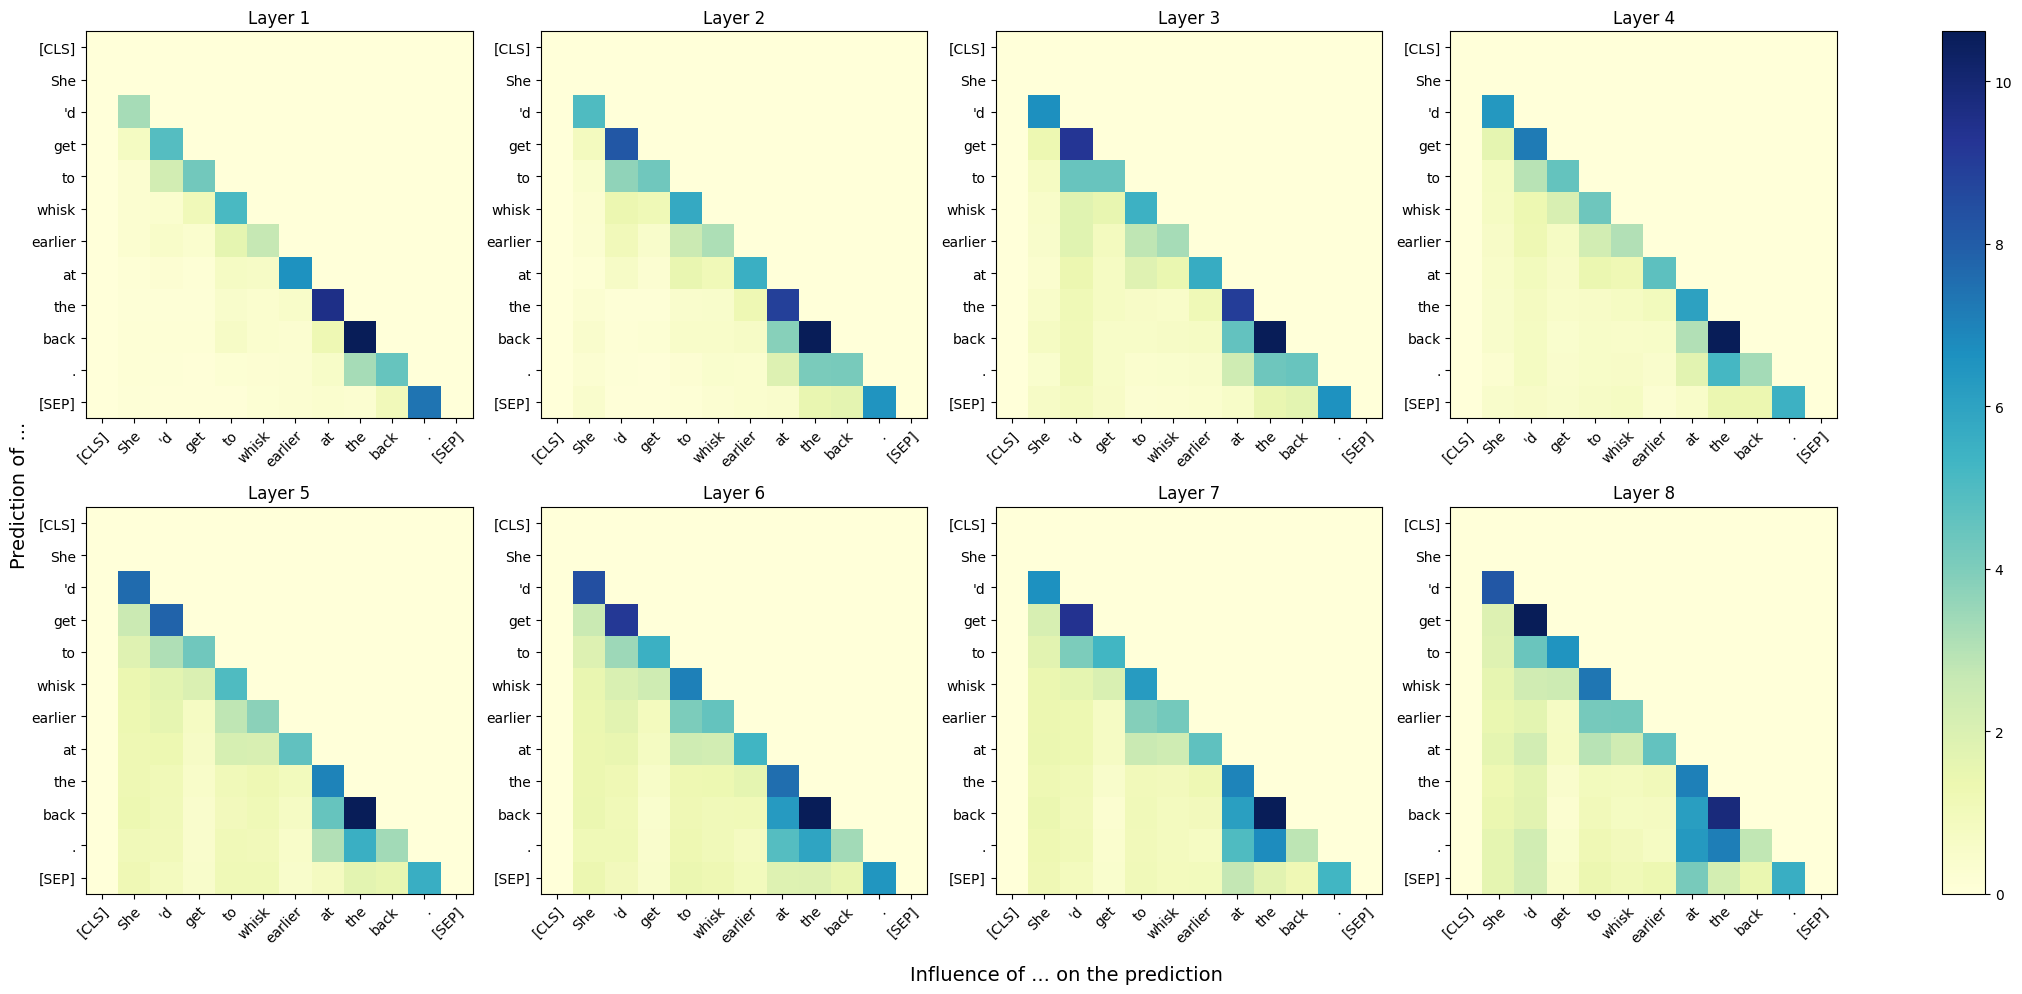

In [ ]:
sentence[2] = "'d"
visualize_all_layer_matrices(sentence, all_matrices)

## Spearman correlation

Spearman correlation are for the similarities between predicted trees and gold trees

In [135]:
def open_spearmann_resultfile(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    
    return data

In [136]:
filename = f'results/spearman_dist_all_deberta_without_punct.pkl'
spearman_data = open_spearmann_resultfile(filename)
spearman_data

FileNotFoundError: [Errno 2] No such file or directory: 'results/spearman_dist_all_deberta_without_punct.pkl'

In [ ]:
zip(*spearman_data['deberta'])

In [ ]:
def plot_spearman_results(spearman_data):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(range(len(spearman_data['deberta'])), list(zip(*spearman_data['deberta']))[0], label='deberta')
    ax.plot(range(len(spearman_data['gpt2'])), list(zip(*spearman_data['gpt2']))[0], label='gpt2')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Spearman correlation (-1 < r < 1)')
    ax.set_title('Spearman correlation')
    ax.legend()
    plt.show()

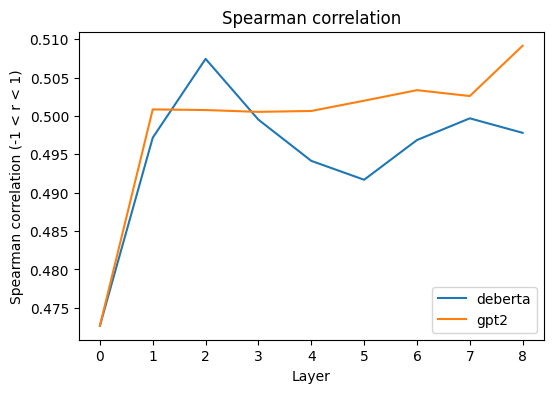

In [ ]:
plot_spearman_results(spearman_data)

## Classic evaluation

In [ ]:
def open_pkl_result(model):
    with open(f'results/classic_dist_all_{model}_without_punct.pkl', 'rb') as f:
        # data is list with tuples per sentene: (precision, recall, f1)
        data = pickle.load(f)
    
    return data

In [ ]:
def plot_pr_rc_f1(data, model):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(range(len(data)), list(zip(*data))[0], label='precision')
    ax.plot(range(len(data)), list(zip(*data))[1], label='recall')
    ax.plot(range(len(data)), list(zip(*data))[2], label='f1')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Score')
    ax.set_title(f'Precision, recall and f1 for {model}')
    ax.legend()
    plt.show()

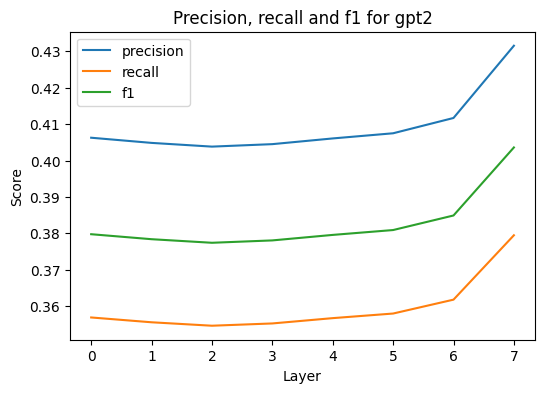

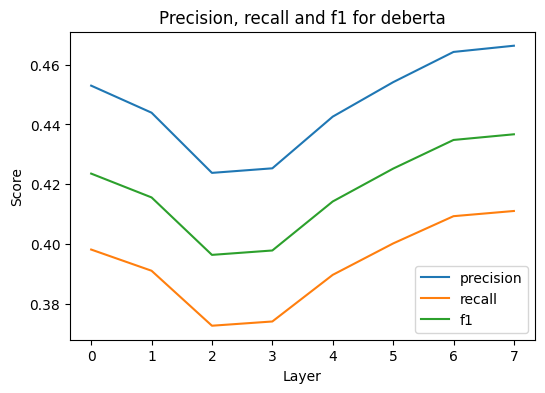

In [ ]:
gpt2_classic = open_pkl_result('gpt2')
deberta_classic = open_pkl_result('deberta')

plot_pr_rc_f1(gpt2_classic, 'gpt2')
plot_pr_rc_f1(deberta_classic, 'deberta')

In [ ]:
def plot_classic_both(data1, data2, model1, model2):
    fig, ax = plt.subplots(figsize=(6, 4))
    colors = ['tab:orange', 'tab:blue', 'tab:green']
    for i, (data, model) in enumerate(zip([data1, data2], [model1, model2])):
        if i == 0:
            style = '-'
        else:
            style = '--'
        ax.plot(range(len(data)), list(zip(*data))[0], label=f'{model} precision', color=colors[0], linestyle=style)
        ax.plot(range(len(data)), list(zip(*data))[1], label=f'{model} recall', color=colors[1], linestyle=style)
        ax.plot(range(len(data)), list(zip(*data))[2], label=f'{model} f1', color=colors[2], linestyle=style)

    # ax.plot(range(len(data1)), list(zip(*data1))[0], label=f'{model1} precision')
    # ax.plot(range(len(data2)), list(zip(*data2))[0], label=f'{model2} precision')

    # ax.plot(range(len(data1)), list(zip(*data1))[1], label=f'{model1} recall')
    # ax.plot(range(len(data2)), list(zip(*data2))[1], label=f'{model2} recall')
    
    # ax.plot(range(len(data1)), list(zip(*data1))[2], label=f'{model1} f1')
    # ax.plot(range(len(data2)), list(zip(*data2))[2], label=f'{model2} f1')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Score')
    ax.set_title(f'Precision, Recall and F1 for {model1} and {model2}')
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


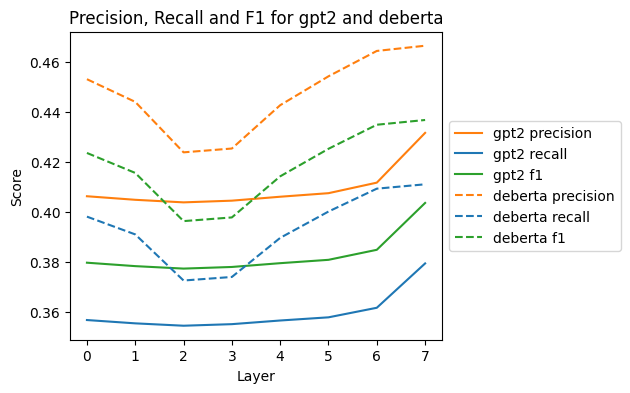

In [ ]:
plot_classic_both(gpt2_classic, deberta_classic, 'gpt2', 'deberta')

## Quantitative analysis MLM and CLM

In [ ]:
def open_pkl_result(model, layer):
    with open(f'results/i_matrices/{model}_dist_{layer}.pkl', 'rb') as f:
        # data is a list with sentences: 
        # each sentence consists of (sentence, tokenized_text, impact matrix, tree2list, nltk_tree)
        data = pickle.load(f)
    
    return data

In [ ]:
def get_all_results():
    mlm_clm_results = {'gpt2' : {}, 'deberta' : {}}

    for model in ['gpt2', 'deberta']:
        for layer in range(1, 9):
            data = open_pkl_result(model, layer)
            mlm_clm_results[model][layer] = data
    
    return mlm_clm_results

In [ ]:
def get_diff_only_lower(mlm_clm_results):
    diff_per_layer = defaultdict(list)
    for i, (clm_layers, mlm_layers) in enumerate(zip(mlm_clm_results['gpt2'].values(), mlm_clm_results['deberta'].values())):
        for s in range(len(clm_layers)):
            # set values upper triangle to 0
            below_mlm = np.tril(mlm_layers[s][2], k=-1)
            diff_per_layer[i].append(np.mean(np.abs(clm_layers[s][2] - below_mlm)))
    return diff_per_layer

In [ ]:
def get_diff_mean_mlm(mlm_clm_results):
    diff_per_layer = defaultdict(list)
    for i, (clm_layers, mlm_layers) in enumerate(zip(mlm_clm_results['gpt2'].values(), mlm_clm_results['deberta'].values())):
        for s in range(len(clm_layers)):
            # mean of upper & lower triangle
            mean_triangles = (np.triu(mlm_layers[s][2], k=1).T + np.tril(mlm_layers[s][2], k=-1)) / 2
            diff_per_layer[i].append(np.mean(np.abs(clm_layers[s][2] - mean_triangles)))
            
    return diff_per_layer

In [ ]:
def plot_diff_per_layer(diff_per_layer):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(range(len(diff_per_layer)), [np.mean(diff_per_layer[i]) for i in range(len(diff_per_layer))])
    ax.set_xlabel('Layer')
    ax.set_ylabel('Mean difference')
    ax.set_title('Mean difference between MLM and CLM')
    plt.show()

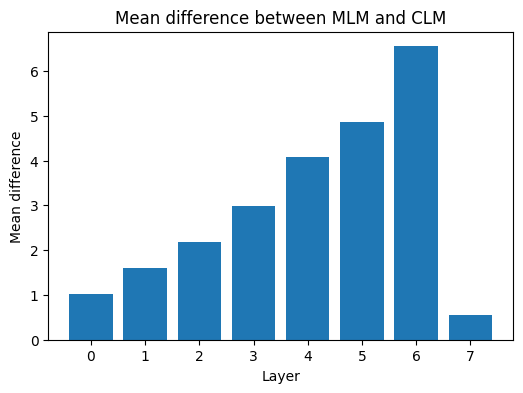

In [ ]:
results = get_all_results()
diff = get_diff_mean_mlm(results)
plot_diff_per_layer(diff)

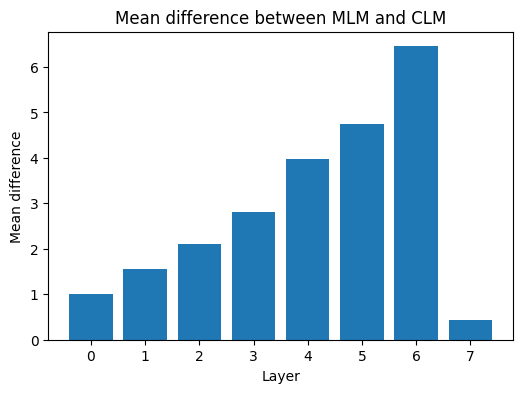

In [ ]:
diff_lower = get_diff_only_lower(results)
plot_diff_per_layer(diff_lower)

In [124]:
def get_diff_matrix_lowertr(mlm_clm_results):
    diff_per_layer = defaultdict(list)
    for i, (clm_layers, mlm_layers) in enumerate(zip(mlm_clm_results['gpt2'].values(), mlm_clm_results['deberta'].values())):
        for s in range(len(clm_layers)):
            # set values upper triangle to 0
            below_mlm = np.tril(mlm_layers[s][2], k=-1)
            diff_per_layer[i].append(np.abs(clm_layers[s][2] - below_mlm))
    return diff_per_layer

In [133]:
def visualize_diff_matrices(matrices, sent_idx):
    # Set up a 2x4 grid for the heatmaps
    fig, axs = plt.subplots(2, 4, figsize=(22, 10))
    
    # Ensure axs is a 2D array for easy indexing, even if there's only one row/column
    axs = axs.reshape(2, 4)
    
    for idx, ax in enumerate(axs.flat):
        # Get the current matrix
        imatrix = matrices[idx][sent_idx]
        
        # Create heatmap
        print(imatrix.shape)
        im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
        
        # Optional: Set a title for each subplot to differentiate, e.g., by layer number
        ax.set_title(f'Layer {idx+1}')
    
    fig.supxlabel('Influence of ... on the prediction', fontsize=14)
    fig.supylabel('Prediction of ...', fontsize=14)

    # Adjust layout to prevent overlap
    fig.tight_layout()
    
    # Add a colorbar to the right of the grid. This adds a colorbar for the last plot,
    # but you might want to adjust or add a common colorbar for all.
    fig.colorbar(im, ax=axs, orientation='vertical', fraction=.1)

(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)


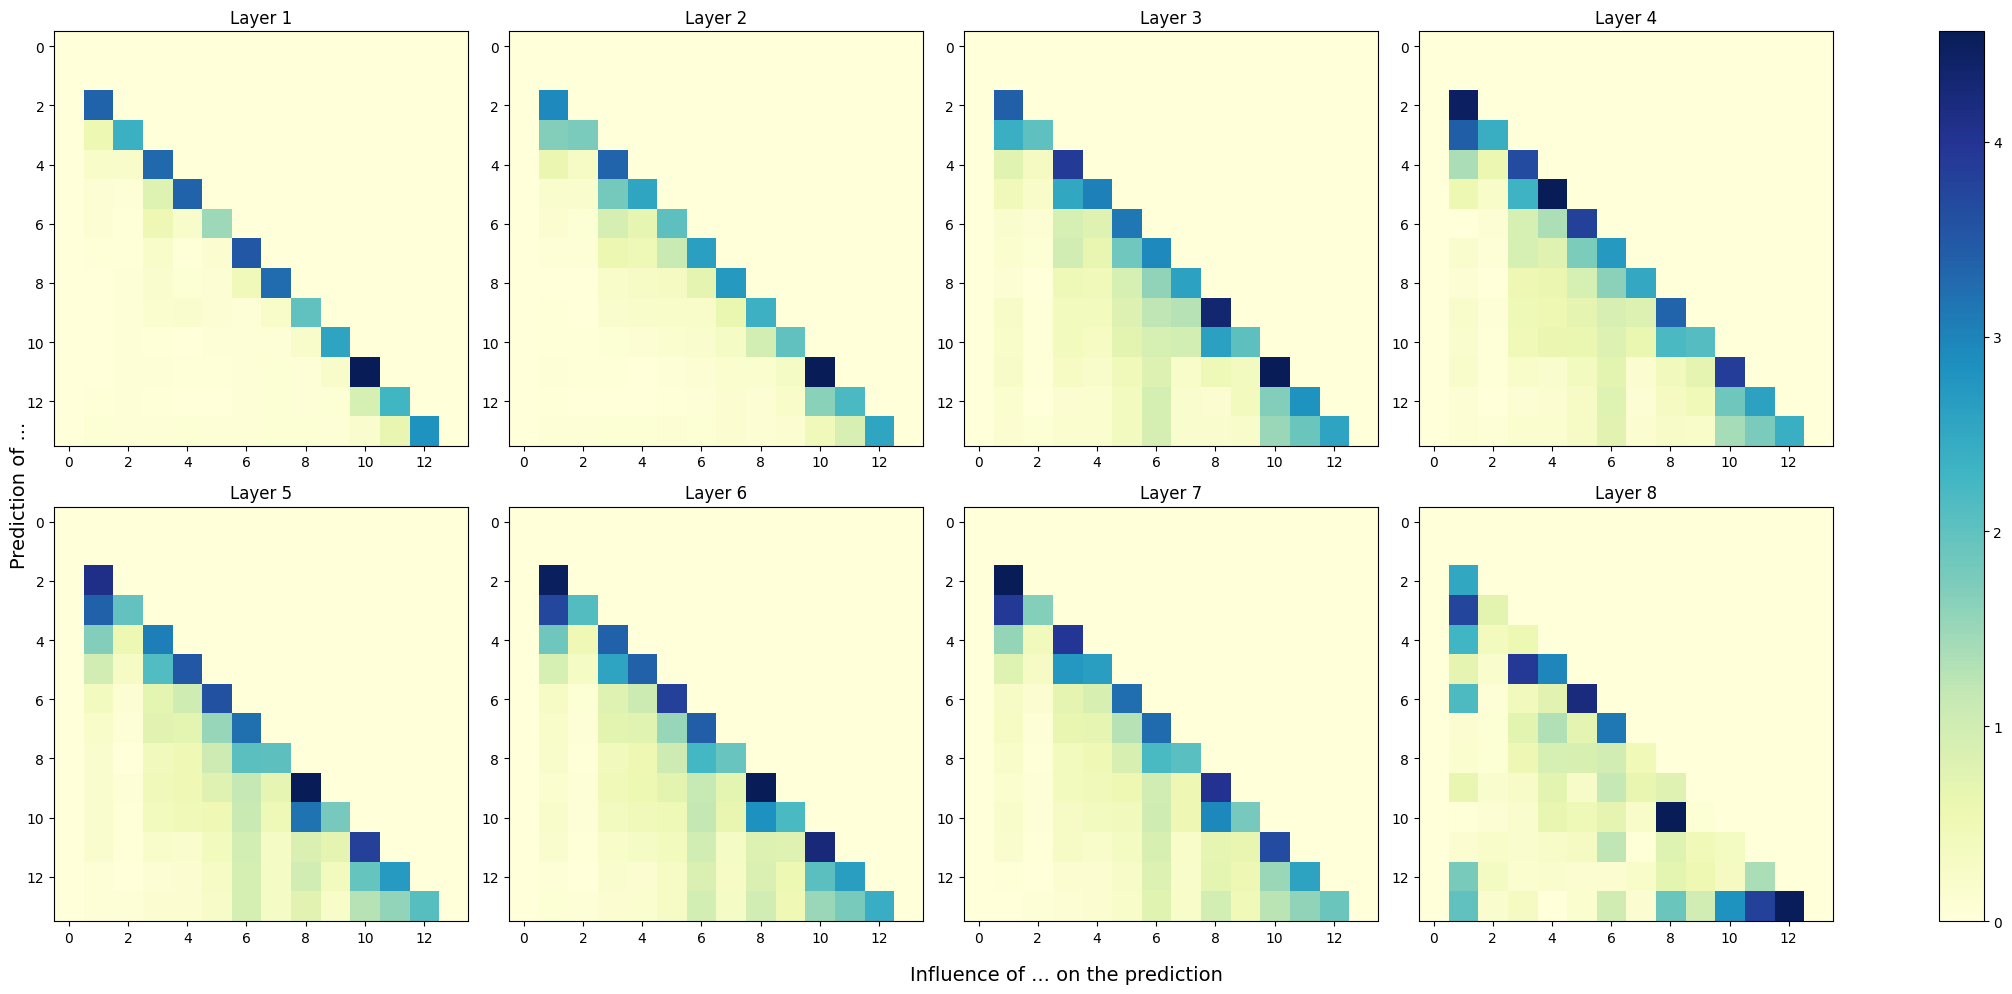

In [134]:
# only for one sentence
data_diff = get_diff_matrix_lowertr(results)
visualize_diff_matrices(data_diff, sent_idx=5)